## Лабораторна робота 5

### Завдання:
#### Скачайте датасет  Amazon Top 50 Bestselling Books 2009 – 2019, що знаходиться  за посиланням.

In [1]:
from pyspark.sql import SparkSession

In [2]:
#Створення схеми
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .appName('Amazon_books')\
        .getOrCreate()

In [3]:
#1.Прочитайте CSV файл spark.read.csv()
df = spark.read.csv(
    'bestsellers with categories.csv',
    sep=',',
    header=True,
    inferSchema = True
)

In [4]:
#2.Вивести схему даних за допомогою PrintSchema.
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- User Rating: double (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)



In [5]:
#3.Вивести назви стовпців і типи даних за допомогою dtypes
df.dtypes

[('Name', 'string'),
 ('Author', 'string'),
 ('User Rating', 'double'),
 ('Reviews', 'int'),
 ('Price', 'int'),
 ('Year', 'int'),
 ('Genre', 'string')]

In [6]:
#4.Виведіть перші п'ять рядків (використовується метод head)
df.head(5)

[Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction'),
 Row(Name='11/22/63: A Novel', Author='Stephen King', User Rating=4.6, Reviews=2052, Price=22, Year=2011, Genre='Fiction'),
 Row(Name='12 Rules for Life: An Antidote to Chaos', Author='Jordan B. Peterson', User Rating=4.7, Reviews=18979, Price=15, Year=2018, Genre='Non Fiction'),
 Row(Name='1984 (Signet Classics)', Author='George Orwell', User Rating=4.7, Reviews=21424, Price=6, Year=2017, Genre='Fiction'),
 Row(Name='5,000 Awesome Facts (About Everything!) (National Geographic Kids)', Author='National Geographic Kids', User Rating=4.8, Reviews=7665, Price=12, Year=2019, Genre='Non Fiction')]

In [7]:
#5.	Вивести перший рядок за допомогою first()
df.first()

Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction')

In [8]:
#6.	Зробіть опис датасету за допомогою describe()
df.describe()

DataFrame[summary: string, Name: string, Author: string, User Rating: string, Reviews: string, Price: string, Year: string, Genre: string]

In [9]:
#7.	Виведіть список стовпців за допомогою columns()
df.columns

['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']

In [10]:
#8.	Виведіть загальну кількість рядків даних за допомогою count()
df.count()

550

In [11]:
#9.	Перевірте, чи у всіх рядків вистачає даних. Якщо є пропуски, замінить їх на NaN, потім тип даних на числовий. 
from pyspark.sql.functions import isnan, when, col
df = df.na.fill("NaN")
for column in df.columns:
    df = df.withColumn(column, when(col(column) == "NaN", col(column).cast("float")).otherwise(col(column)))
df.head(10)

[Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350.0, Price=8.0, Year=2016.0, Genre='Non Fiction'),
 Row(Name='11/22/63: A Novel', Author='Stephen King', User Rating=4.6, Reviews=2052.0, Price=22.0, Year=2011.0, Genre='Fiction'),
 Row(Name='12 Rules for Life: An Antidote to Chaos', Author='Jordan B. Peterson', User Rating=4.7, Reviews=18979.0, Price=15.0, Year=2018.0, Genre='Non Fiction'),
 Row(Name='1984 (Signet Classics)', Author='George Orwell', User Rating=4.7, Reviews=21424.0, Price=6.0, Year=2017.0, Genre='Fiction'),
 Row(Name='5,000 Awesome Facts (About Everything!) (National Geographic Kids)', Author='National Geographic Kids', User Rating=4.8, Reviews=7665.0, Price=12.0, Year=2019.0, Genre='Non Fiction'),
 Row(Name='A Dance with Dragons (A Song of Ice and Fire)', Author='George R. R. Martin', User Rating=4.4, Reviews=12643.0, Price=11.0, Year=2011.0, Genre='Fiction'),
 Row(Name='A Game of Thrones / A Clash of Kings / A Storm of Swords 

In [12]:
#10.	Замініть комірки з пропущеними значенями на середні за стовпцем. І тип даних на float. Про скільки книг зберігає дані датасет? 
from pyspark.sql.functions import mean
for column in df.columns:
    df = df.replace(0.0, df.select(mean(df[column])).collect()[0][0])
df.head(10)

[Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350.0, Price=8.0, Year=2016.0, Genre='Non Fiction'),
 Row(Name='11/22/63: A Novel', Author='Stephen King', User Rating=4.6, Reviews=2052.0, Price=22.0, Year=2011.0, Genre='Fiction'),
 Row(Name='12 Rules for Life: An Antidote to Chaos', Author='Jordan B. Peterson', User Rating=4.7, Reviews=18979.0, Price=15.0, Year=2018.0, Genre='Non Fiction'),
 Row(Name='1984 (Signet Classics)', Author='George Orwell', User Rating=4.7, Reviews=21424.0, Price=6.0, Year=2017.0, Genre='Fiction'),
 Row(Name='5,000 Awesome Facts (About Everything!) (National Geographic Kids)', Author='National Geographic Kids', User Rating=4.8, Reviews=7665.0, Price=12.0, Year=2019.0, Genre='Non Fiction'),
 Row(Name='A Dance with Dragons (A Song of Ice and Fire)', Author='George R. R. Martin', User Rating=4.4, Reviews=12643.0, Price=11.0, Year=2011.0, Genre='Fiction'),
 Row(Name='A Game of Thrones / A Clash of Kings / A Storm of Swords 

In [13]:
#11.	Змініть назви всіх колонок: назва з маленької букви, без пробілів через підкреслення. 
df = df.toDF(*(col.lower().replace(' ', '_') for col in df.columns))

df.head(10)

[Row(name='10-Day Green Smoothie Cleanse', author='JJ Smith', user_rating=4.7, reviews=17350.0, price=8.0, year=2016.0, genre='Non Fiction'),
 Row(name='11/22/63: A Novel', author='Stephen King', user_rating=4.6, reviews=2052.0, price=22.0, year=2011.0, genre='Fiction'),
 Row(name='12 Rules for Life: An Antidote to Chaos', author='Jordan B. Peterson', user_rating=4.7, reviews=18979.0, price=15.0, year=2018.0, genre='Non Fiction'),
 Row(name='1984 (Signet Classics)', author='George Orwell', user_rating=4.7, reviews=21424.0, price=6.0, year=2017.0, genre='Fiction'),
 Row(name='5,000 Awesome Facts (About Everything!) (National Geographic Kids)', author='National Geographic Kids', user_rating=4.8, reviews=7665.0, price=12.0, year=2019.0, genre='Non Fiction'),
 Row(name='A Dance with Dragons (A Song of Ice and Fire)', author='George R. R. Martin', user_rating=4.4, reviews=12643.0, price=11.0, year=2011.0, genre='Fiction'),
 Row(name='A Game of Thrones / A Clash of Kings / A Storm of Swords 

In [14]:
#13.	Знайдіть автора з найвищим рейтингом.
author_best_rated = df.orderBy(df.user_rating.desc()).select("author").first()[0]
print(author_best_rated)

Bill Martin Jr.


In [15]:
#14.	Знайдіть автора з найнижчим рейтингом.
author_less_rated = df.orderBy(df.user_rating.asc()).select("author").first()[0]
print(author_less_rated)

J.K. Rowling


In [16]:
#15.	Знайдіть автора, що має найбільшу кількіть рецензій.
most_revws_author = df.orderBy(df.reviews.desc()).select("author").first()[0]
print(most_revws_author)

Delia Owens


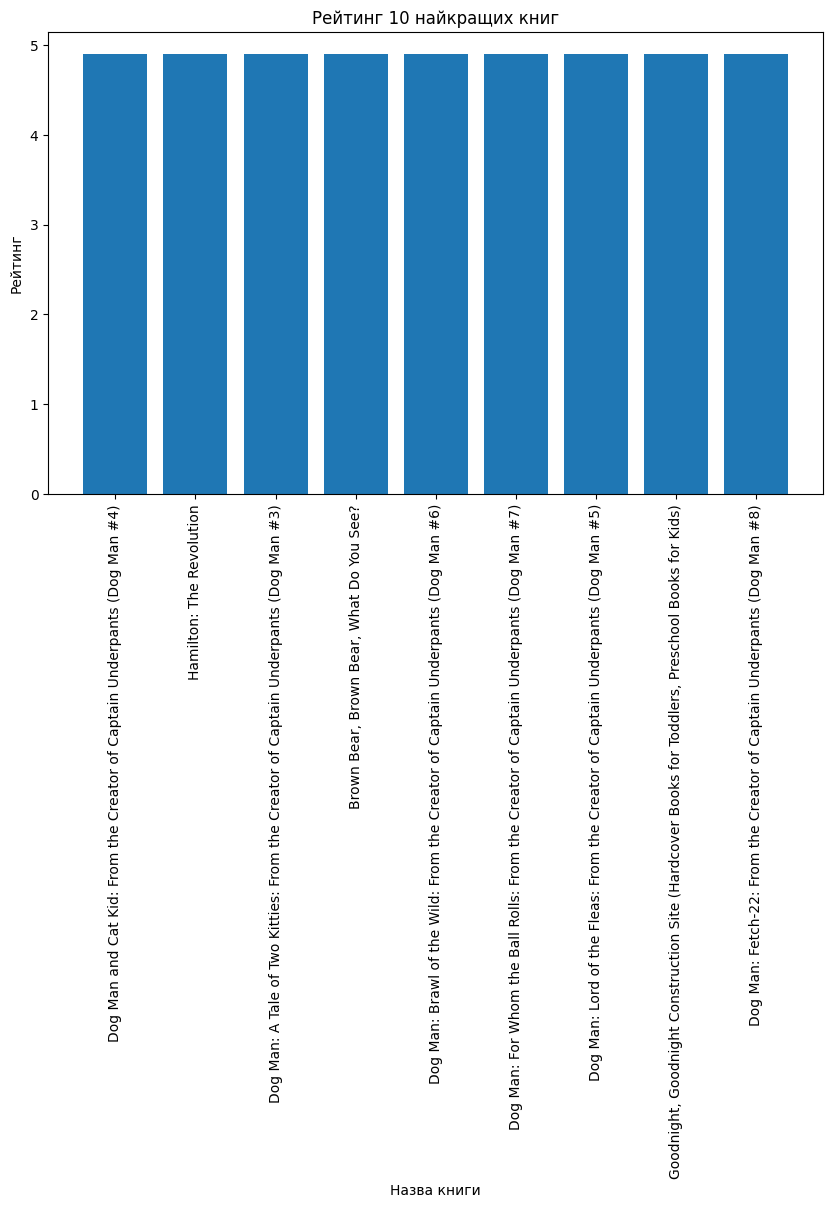

In [17]:
#16.	Побудуйте гістограму рейтингу 10 найкращих книг (відібрати книги з найбільшим рейтингом).
from matplotlib import pyplot as plt

top_10_rated_books = df.orderBy(df.user_rating.desc()).limit(10).toPandas()

plt.figure(figsize=(10, 6))
plt.bar(top_10_rated_books['name'], top_10_rated_books['user_rating'])
plt.xlabel('Назва книги')
plt.ylabel('Рейтинг')
plt.title('Рейтинг 10 найкращих книг')
plt.xticks(rotation=90)
plt.show()

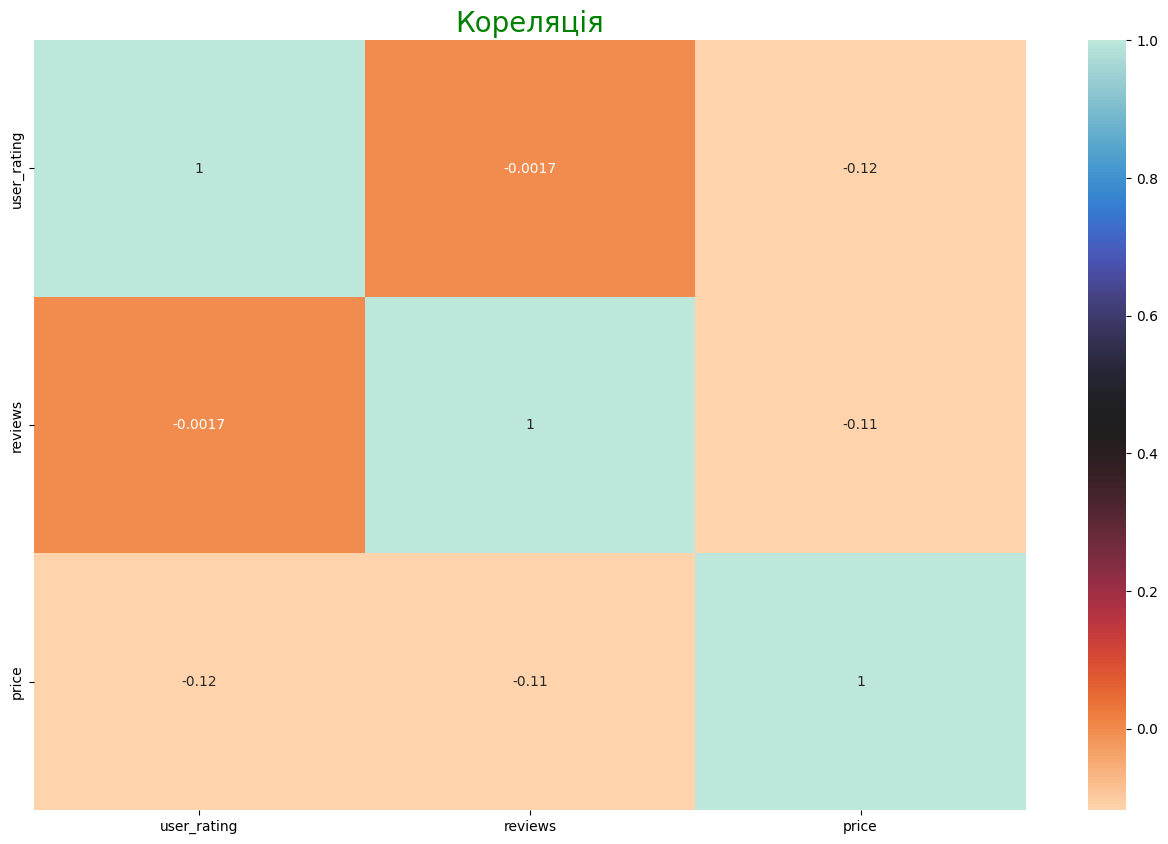

In [18]:
#17.	Побудуйте матрицю кореляції для стовпчиків 'user_rating', 'reviews', 'price'.
import seaborn as sns
plt.rcParams["figure.figsize"] = (16, 10)
sns.heatmap(df.select('user_rating', 'reviews', 'price').toPandas().corr(), annot=True, cmap='icefire_r')
plt.title('Кореляція', fontsize=20, color='g')
plt.show()

#### Висновок, на лабораторній роботі я навчилася використовувати знання з PySpark на практиці та аналізувати великі обєми даних.